In [99]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas_profiling import ProfileReport
warnings.filterwarnings('ignore')

In [42]:
dane  = pd.read_csv("heart_disease_dataset.csv") 


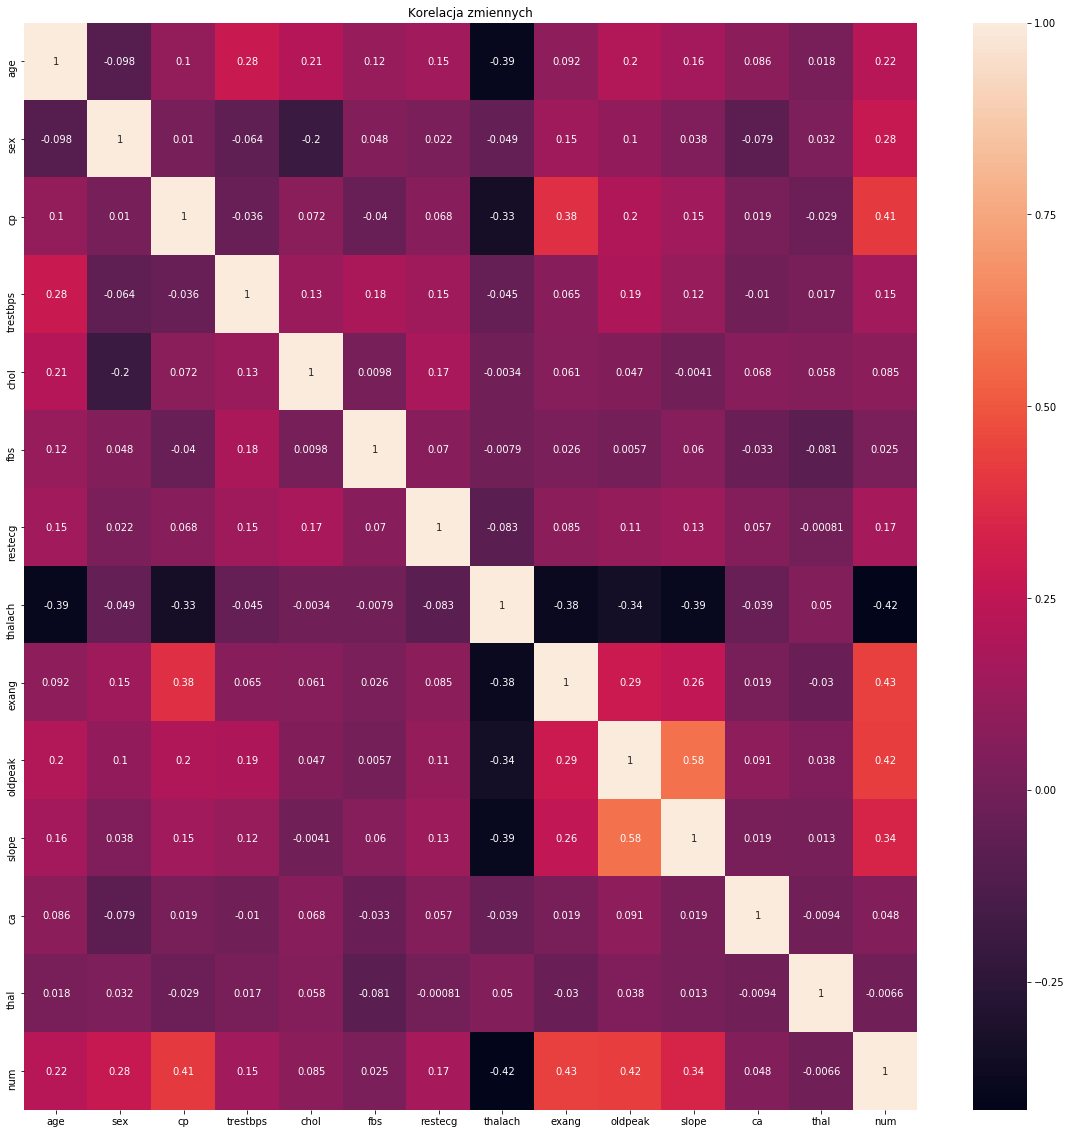

In [23]:
# Tworzenie macierzy korelacji
corr=dane.corr()

ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.rcParams["figure.figsize"]=20,20
plt.show()

# Rozważmy najwyższą korelację czyli miedzy zmiennymi odlpeak and slope

Text(0, 0.5, 'slope')

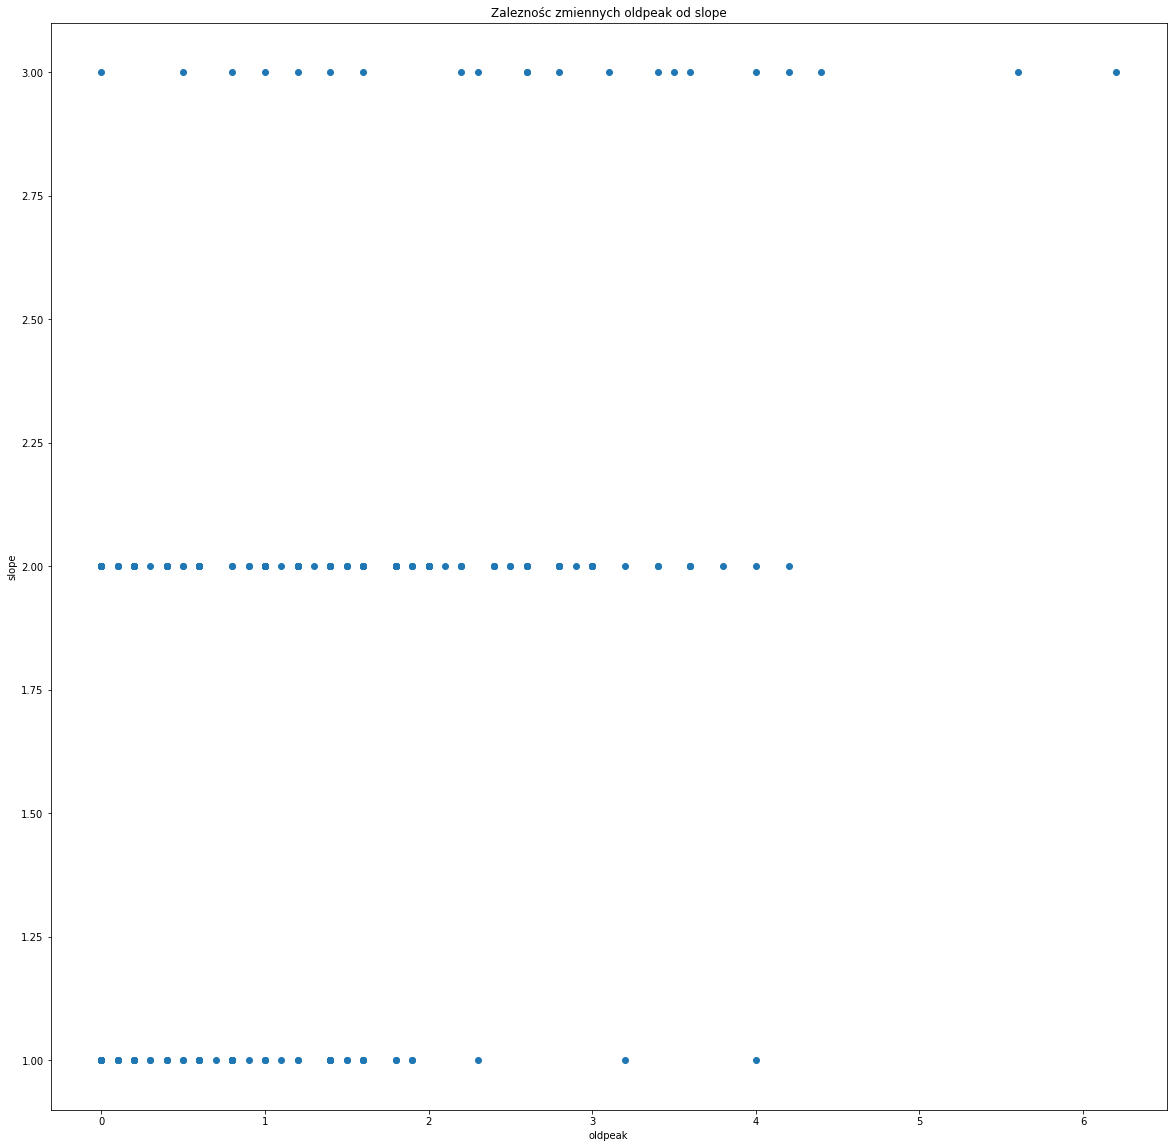

In [13]:
plt.plot(dane.oldpeak,dane.slope, 'o')
plt.title('Zaleznośc zmiennych oldpeak od slope')
plt.xlabel('oldpeak')
plt.ylabel('slope')
# Zauwazmy większy rozrzut oldpeak w 3 kategorii zmiennej slope 
# Przyjżyjmy się bliżej rozkładowi zmiennej oldpeak 

Text(0.5, 1.0, 'Histogram zmiennej oldpeak')

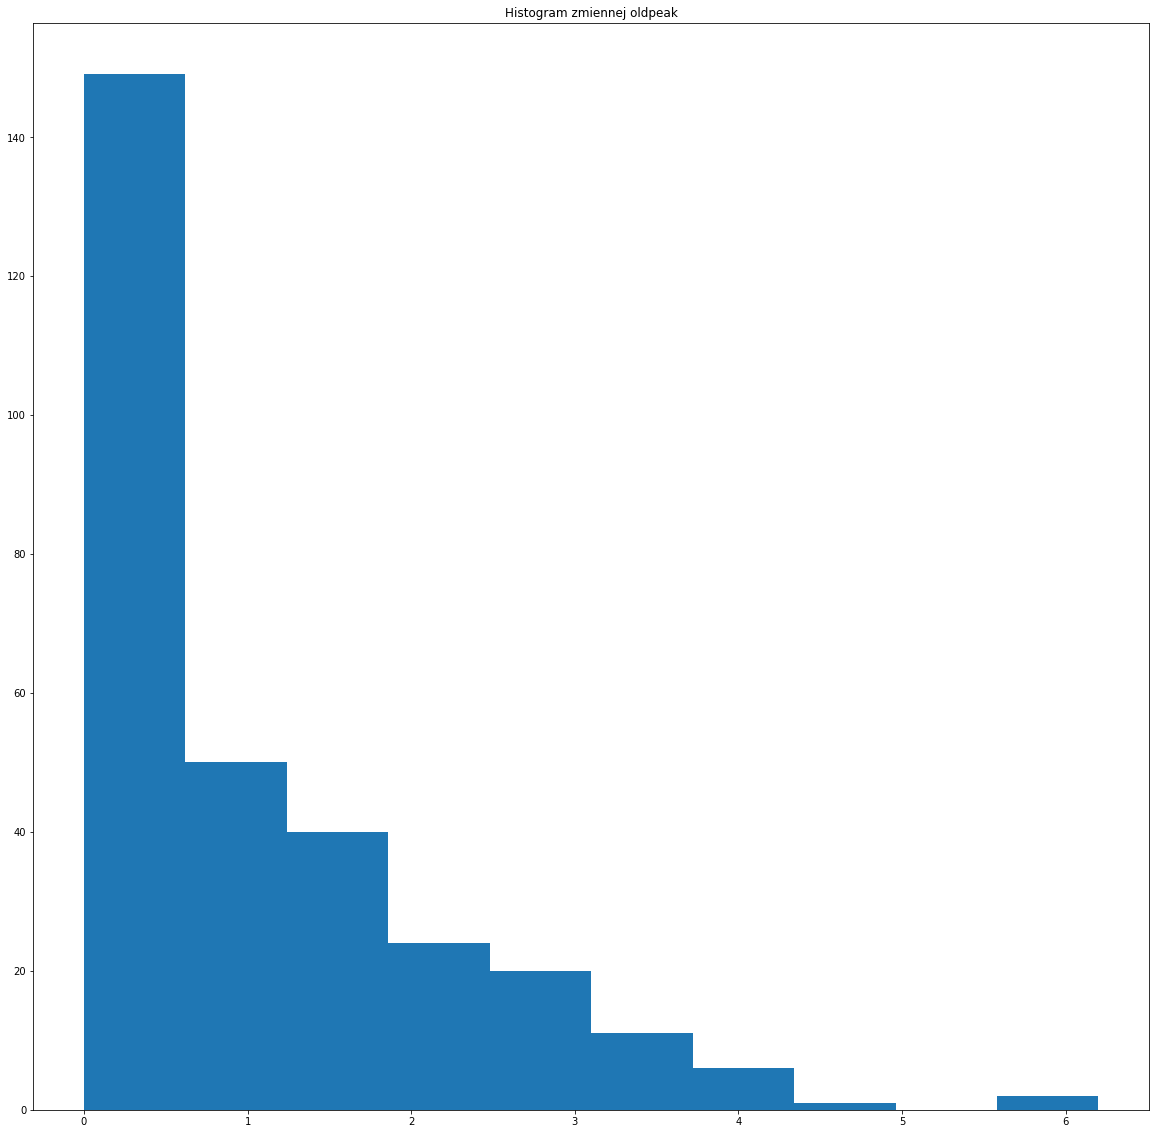

In [18]:
plt.hist(dane.oldpeak)
plt.title("Histogram zmiennej oldpeak")
# Jak widąc zmienna oldpeak ma rozkład wykładniczy przyjrzyjmy się outlierom tej zmiennej 

Text(0.5, 1.0, 'Boxplot zmiennej oldpeak ')

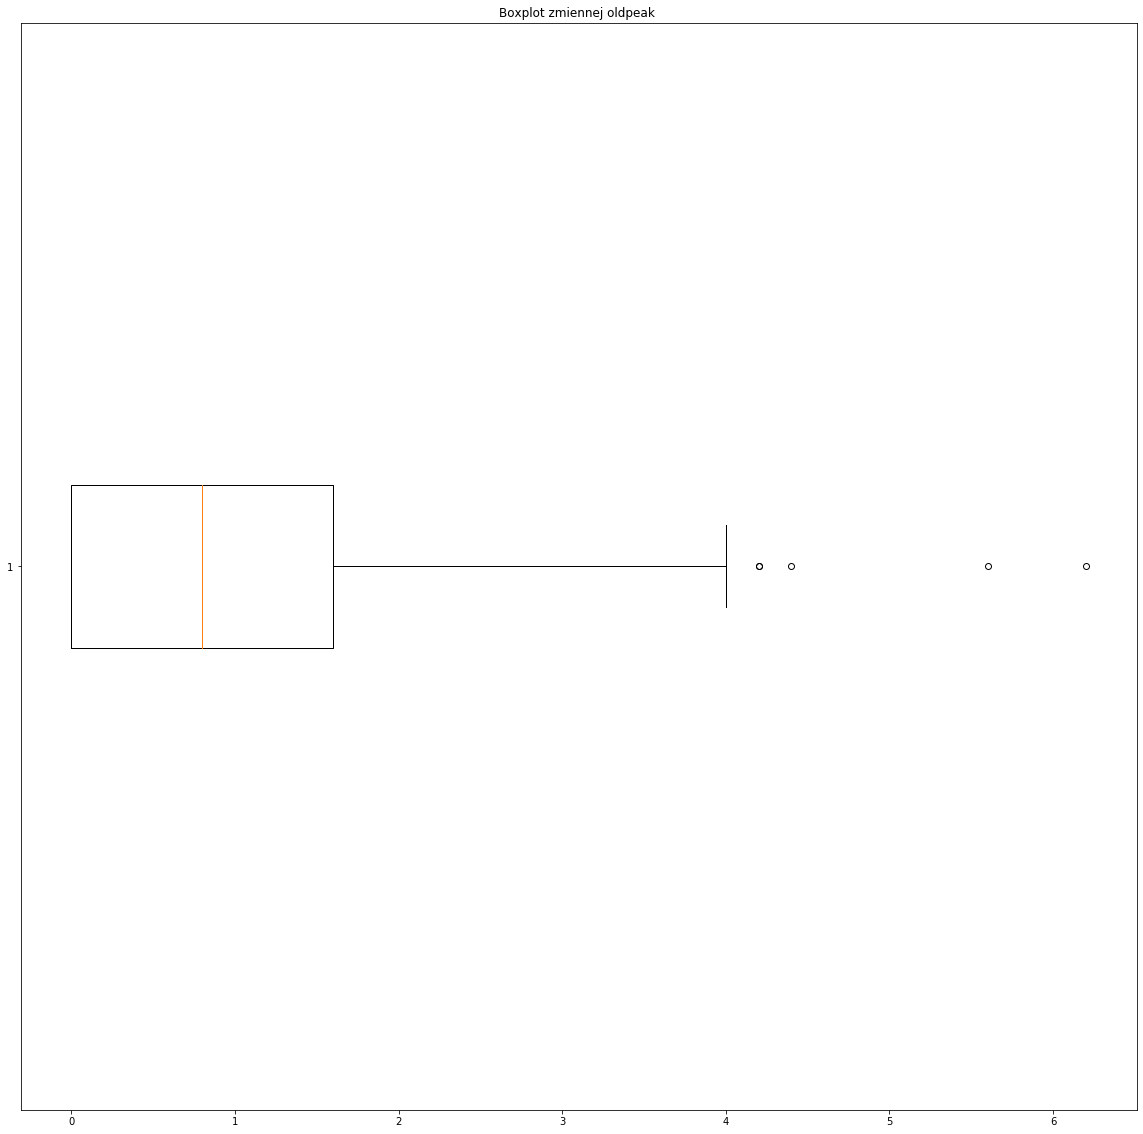

In [21]:
#Spójrzmy najpierw na boxplot tej zmiennej
plt.boxplot(dane.oldpeak,vert=False)
plt.title("Boxplot zmiennej oldpeak ")
# Na boxplocie widać outliery sprawdzę teraz jaka jest wartość zmienenj slope dla tych obserwacij 

In [46]:
oldpeak_slope = dane.iloc[:,[9,10]]

Q1 = oldpeak_slope.oldpeak.quantile(0.25)
Q3 = oldpeak_slope.oldpeak.quantile(0.75)
IQR = Q3-Q1
UIF = Q3 +3/2*IQR
oldpeak_slope = oldpeak_slope[oldpeak_slope.oldpeak>UIF]
oldpeak_slope
# Zauważmy ,że 80% najwyższych wartości zmiennej oldpeak jest kategorii 3 zmiennej slope. Należy jednak wziąść
# pod uwagę bardzo mało próbkę możliwę ,że jest to czysty przypadek 


,oldpeak,slope
91,6.2,3
123,5.6,3
183,4.2,3
191,4.2,2
285,4.4,3


Text(0.5, 1.0, 'Rozrzut zmiennej oldpeak w zależności od slope')

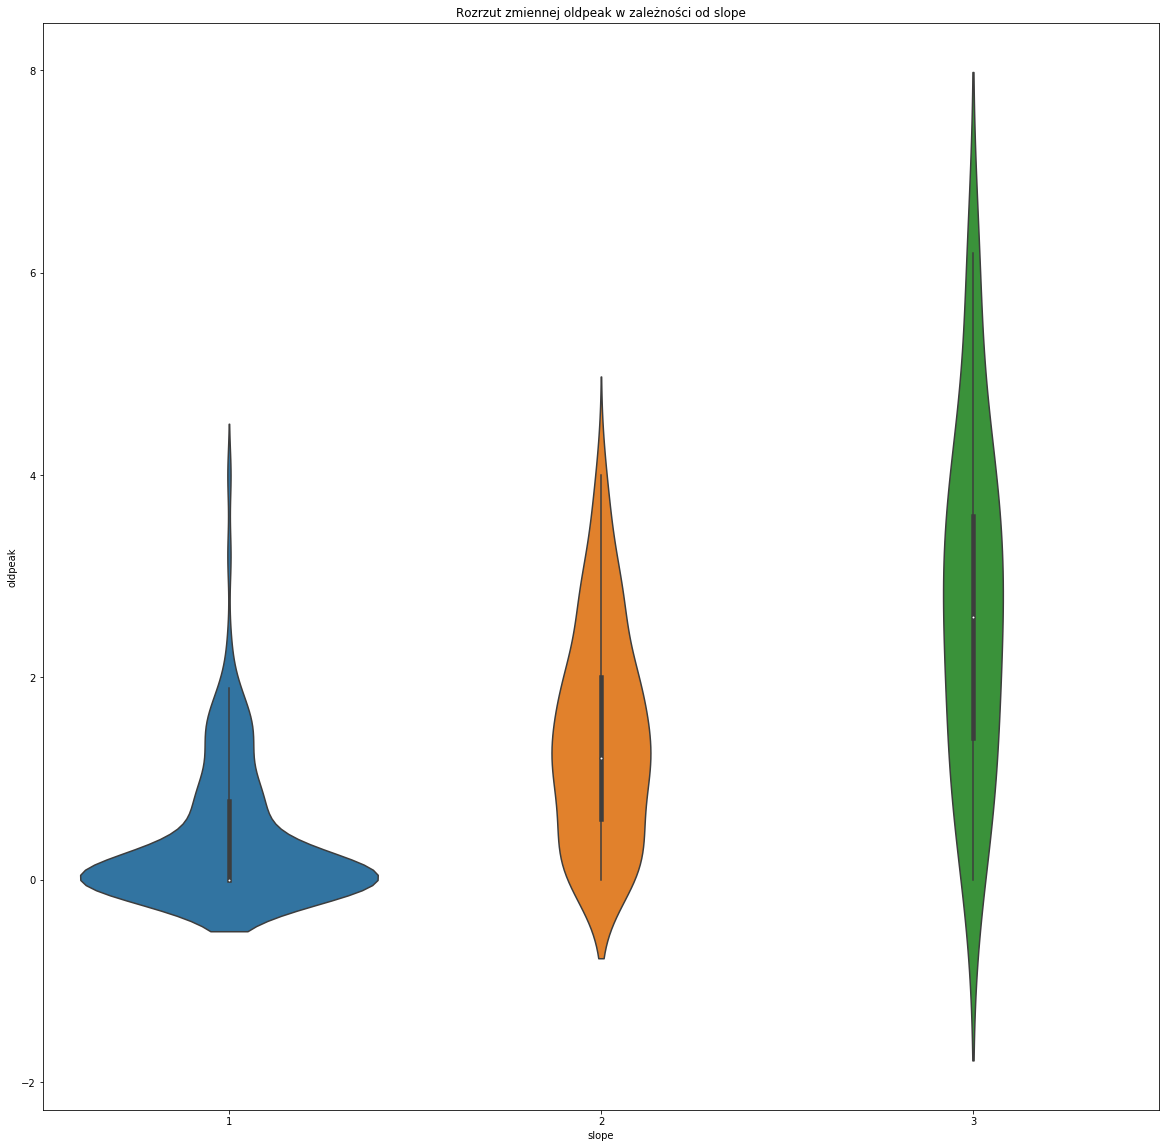

In [48]:
# Warto też spojrzeć na rozrzut zmiennej oldpeak w stosunku do zminnej slope 
oldpeak_slope = dane.iloc[:,[9,10]]
sns.violinplot(oldpeak_slope.slope,oldpeak_slope.oldpeak)
plt.title("Rozrzut zmiennej oldpeak w zależności od slope")
# Na wykresie wyrażnie widać dużo większy rozrzut zmiennej oldpeak w 3 kategori zminnej slope 
# Wszystkie powyższe wykresy wskazują na zależność rozrzutu zmiennej oldpeak od zminnej slope

0
1
2
3
4


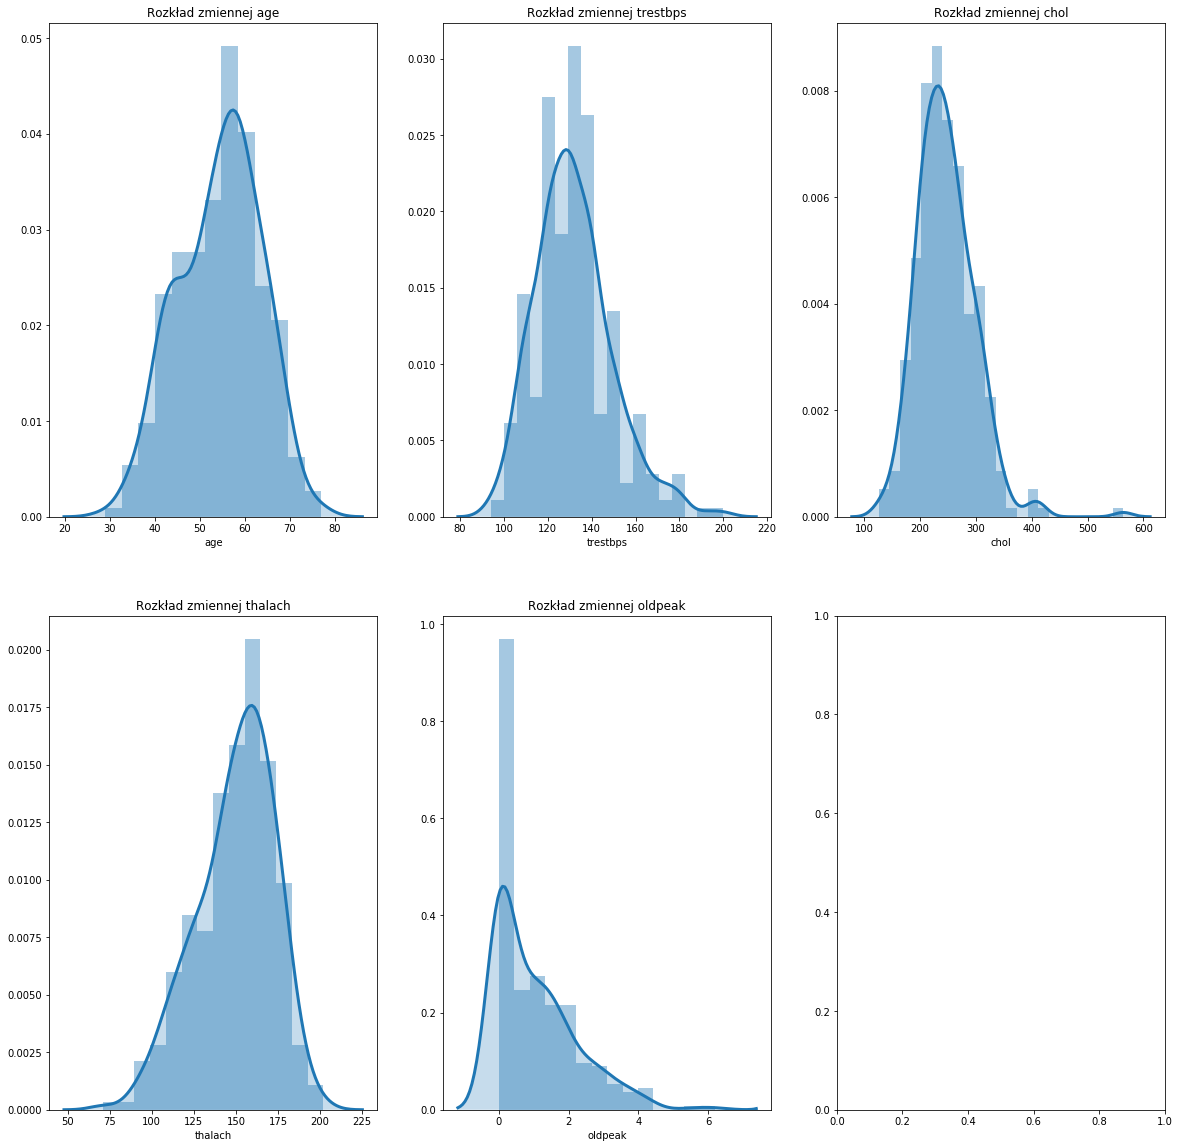

In [80]:
# Przyjrzę się teraz rozkładom zmiennych ciagłych 
# z informacij o ramce danych wiemy ,że zmiennymi ciągłymi są: age,trestbps,chol,thalach,oldpeak
# Spójrzmy teraz na ich gęstości 
fig, axs = plt.subplots(ncols=3,nrows=2)
# Lista nazw zmiennych ciągłych 
variables = ["age",'trestbps','chol','thalach','oldpeak']
pointer = 0
# Rysowanie wykresów gęstości w pętli 
for i in variables:
    plot_dens=sns.distplot(dane[i], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                         ax=axs[ pointer//3 ,pointer%3]).set_title("Rozkład zmiennej " + i)
    pointer +=1 
    
# Zmienne age trestbps oraz tbalach przypominają rozkład normalny , zmienna chol także zbliża się do rozkładu 
# normalnego choć o mniejszej warjancij , zmienna oldpeak jak stwierdziłem wcześniej ma raczej rozkład 
# wykładniczy 


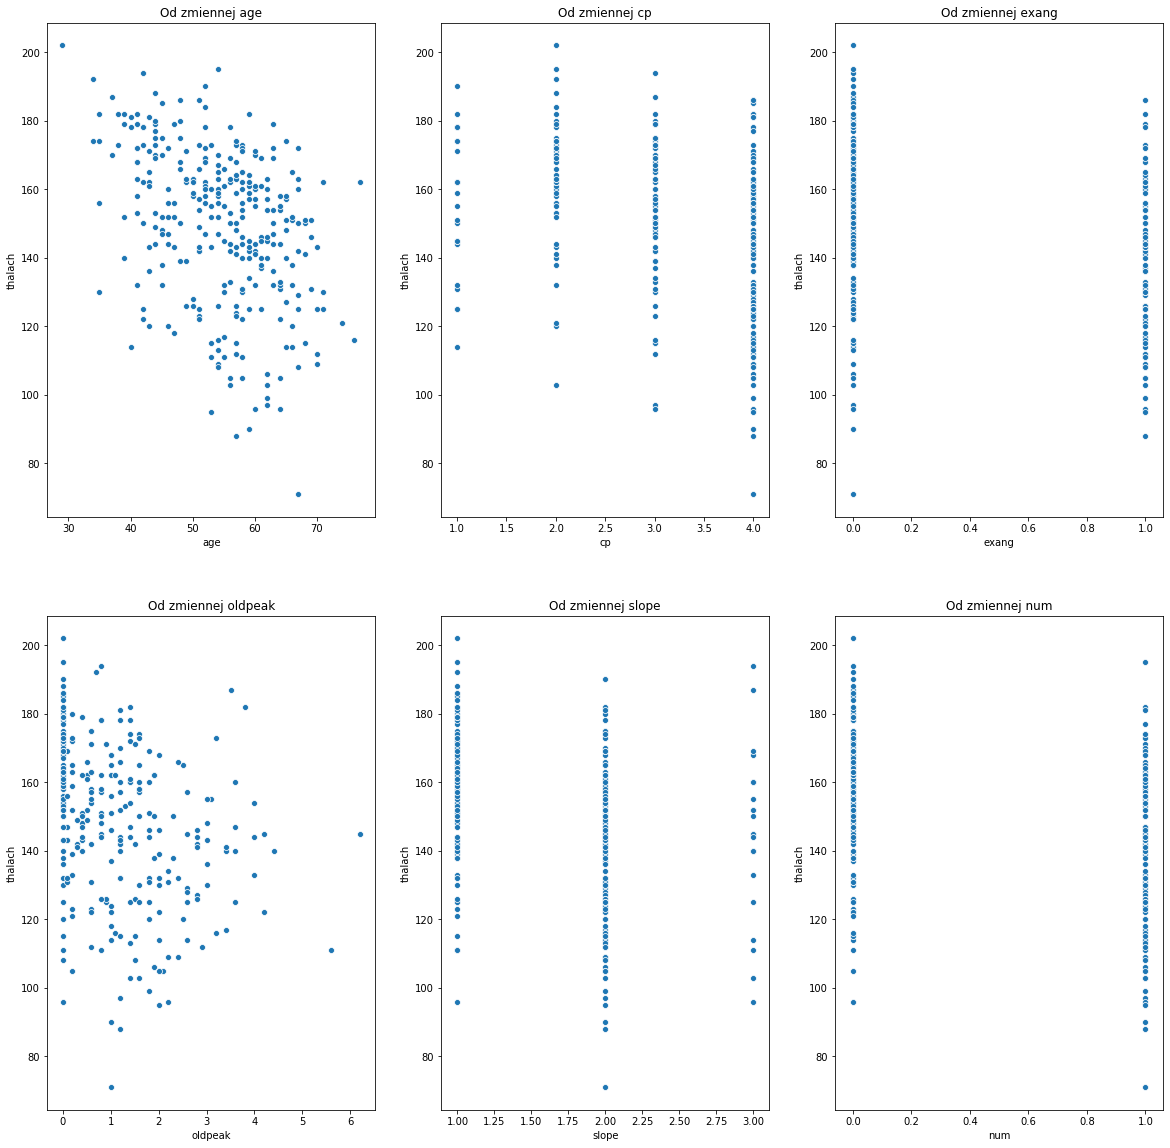

In [95]:
# Przyjrzę się jescze zmienej thalach (oznaczjącej maksymalne osiąganą ilość uderzeń serca na sekunde)
# ponieważ wyjdaję się mieć ujemną korelacjie z kilkoma innymi 
# takimi jak age,cp,exang,oldpeak,slope,num
# przyjrzyjmy się tym korelacjom 
# Wykorzystamy podobny kod jak poprzednio 
# Lista nazw zmiennych ciągłych 
fig, axs = plt.subplots(ncols=3,nrows=2)
variables = ["age",'cp','exang','oldpeak','slope',"num"]
pointer = 0
# Rysowanie wykresów w pętli 
for i in variables:
    plot_dens=sns.scatterplot(dane[i],dane.thalach,ax=axs[ pointer//3 ,pointer%3]).set_title("Od zmiennej "+i)
    
    pointer +=1 

# cp - chest pain type: 1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic
# exang - exercise induced angina: 1=yes; 0=no
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping
# num - 0=HEART DISEASE; 1=NO HEART DISEASE 
# W przypadku zmiennych ciągłych można dostrzec słabą korelacje z wiekiem, korelacja ze zminną oldpeak wydaje 
# się nie być istotna 


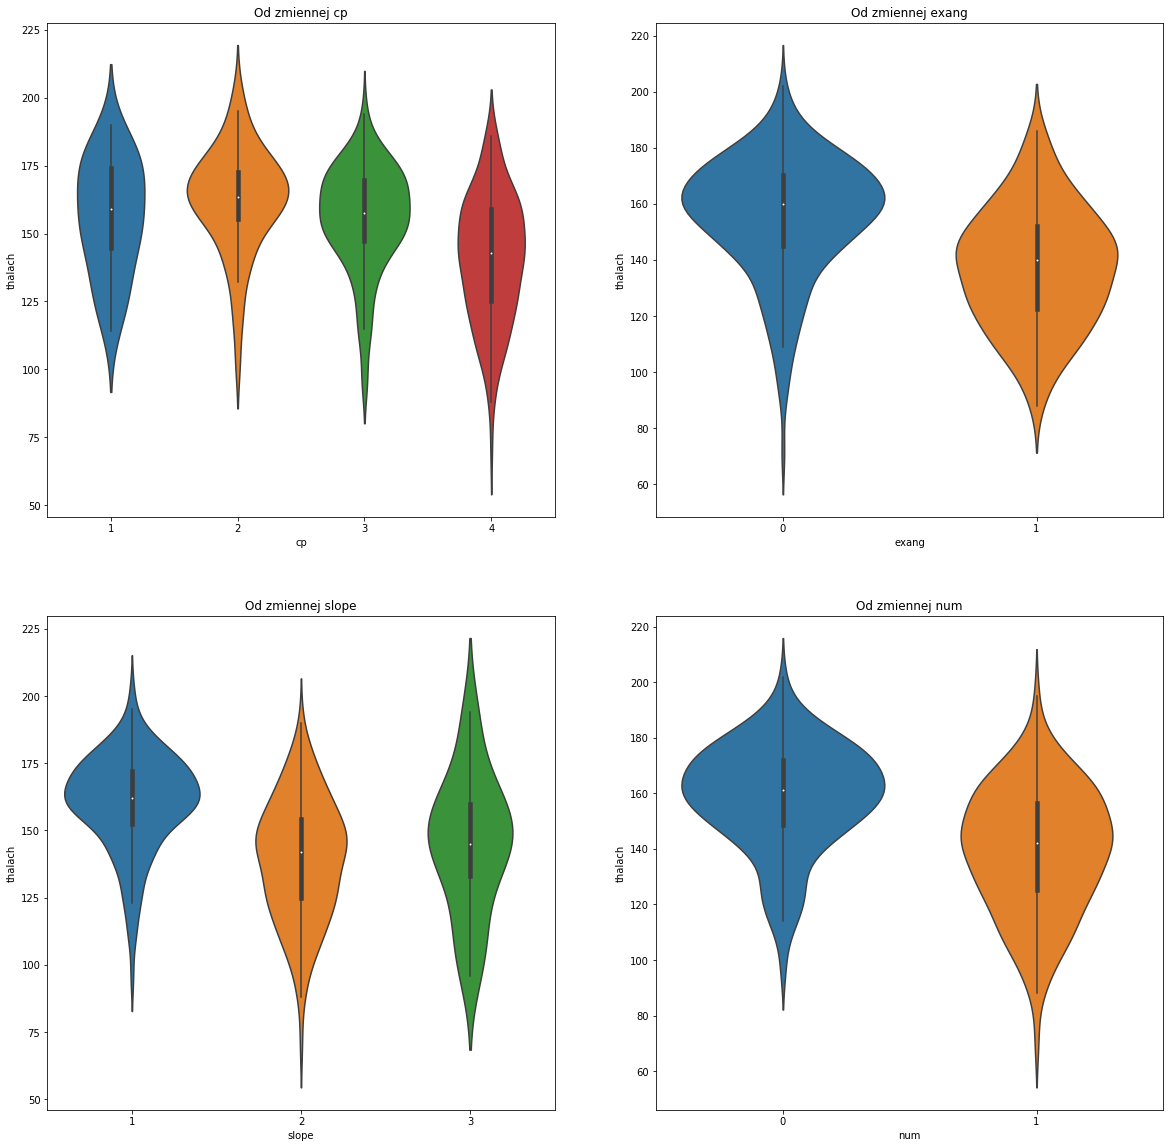

In [96]:
# Przyjrzyjmy się jeszcze raz tym samym zmiennym ale tym razem tylko kategorycznym 
fig, axs = plt.subplots(ncols=2,nrows=2)
variables = ['cp','exang','slope',"num"]
pointer = 0
# Rysowanie wykresów gęstości w pętli 
for i in variables:
    plot_dens=sns.violinplot(dane[i],dane.thalach,ax=axs[ pointer//2 ,pointer%2]).set_title("Od zmiennej "+i)
    pointer +=1 
# takie wykresy przedstawjają lepeij zależność rozkładu tej zmiennej od zmiennych kategorycznych 
# Wykres 1.1 niskie wartości thalach wystepują tylko dal cp = 4 oraz dla cp>=1 wartości się zmniejszają 
# Wykres 1.2 sytuacja podobna jak wyżej tchalach przyjmuje niższe wartości dla exang =1 
# Wykres 2.1 tutaj  korelacja nie jest wyrażna ale można zauważyc większe rozproszenie wyników dla kategori 2 i 3 
# Wykres 2.2 wyrażnie widać ,że u ludzi z chorobą serca zmienna thalach przyjmuje mniejsze wartości
# Wszystko powyrzej może jednak wynikać tylko z badań na małej próbce(około 300 rekordów )


In [100]:
# Na koniec sprawdę jeszcze pakiet do automatycznej eksploracij pandas-profiling
profile = ProfileReport(dane, title='Pandas Profiling Heart disease data', html={'style':{'full_width':True}})

In [101]:
profile

In [ ]:
# Generowana automatycznie eksploracja ma wiele plusów przedwszystkim oszczędza czas. Oprócz oczywistych 
# ograniczeń takich jak np wyswietlenie zbyt dużej ilości często zbędnych informacij należy wskazać problemy 
# takie jak : 
# Nie zawsze poprawne rozpozanawanie zminnych kategorycznych # np zmienna ca, ujemne wartości oznacząją tam brak danych
# Brak wykresó bezpośrednoi łączących zmienne ciągłe z kategorycznymi np. rozkłady względem kategroii.
# Najważnjejszym ograniczeniem powinna być jednak nieedytowalność raportu przykładowo brak możliwości 
# wyświetlenia macierzy korelacij dla wybranych zmiennych 
# można to oczywisćie zrobić ręcznie lub grnerująć nowy raport dla zawężonego zbioru ale cięzko wtedy mówić 
# o automatyzacij. 
# Podsumowując, wydaje się być to dobre i szybkie narzędzie ale nie należy polegać w całości na nim przy 
# eksploracij danych.